In [1]:
## pagerank를 단어에 적용한 것 -> textrank
## PR(t1) : t1이라는 페이지의 페이지 랭크 값
## C(t1) : t1이라는 페이지가 가지고 있는 링크의 총 갯수

In [2]:
## 그래프 : 노드와 엣지의 집합으로 구성된 자료구조
## 노드 : 그래프를 구서하는 기본 단위
## 엣지 : 중요도

In [64]:
## 딸기 바나나 사과 딸기 파인애플
## 1. 그래프 생성하기
## window size : 2
## 딸기 바나나 : 1번 탐색 (노드 추가, 엣지 연결)
## 바나나 사과 : 2번 탐색 (노드 추가, 엣지 연결)
## 사과 딸기 : 3번 탐색 (엣지만 연결)
## 딸기 파인애플 : 4번 탐색(노드 추가, 엣지 연결)

In [65]:
## 태깅
## 명사1 조사1 명사2 명사3 조사2
## 노드는 명사1, 명사2, 명사3만 생성
## 조사들은 무시한다(의미X) 

In [66]:
def textrank_score() :
    list_node = {'banana':1, 'apple':1, 'berry':1, 'pine':1} ## 초기값
    list_edge = {'banana':2, 'apple':2, 'berry':3, 'pine':1} ## 노드 수
    list1 = ['banana_apple', 'apple_berry', 'banana_berry', 'pine_berry']
    
    d = 0.85
    
    for i in list_node : ## 노드들의 점수를 업데이트할 포문
        for j in range(0, int(list_edge[i])) : ## 연결된 노드 갯수
            for k in list1 : ## 합
                
                sigma = 0
                if str(i) in str(k) :
                    k_list = k.split('_')
                    k_list.remove(i)
                    sigma =  (1/list_edge[k_list[0]])*list_node[k_list[0]]
                    sigma+=sigma
                    
                else :
                    pass
                score = (1-d) + (d*(sigma))
                score = round(score,2)
                list_node[i] = score
    return list_node
    
score = textrank_score()
print(score)

{'banana': 0.15, 'apple': 0.15, 'berry': 1.85, 'pine': 1.2}


## 핵심 키워드 추출

In [72]:
import pandas as pd
import requests 
import re
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings(action='ignore')

In [85]:
## 문재인 대통령
resp = requests.request("GET", "https://ko.wikisource.org/wiki/%EB%AC%B8%EC%9E%AC%EC%9D%B8_%EC%B6%9C%EB%A7%88%EC%84%A0%EC%96%B8%EB%AC%B8")
soup = bs(resp.text)

find_div = soup.find('div', style = 'width: 500px; margin:auto; text-align:justify;')
find_p = find_div.find_all('p')
content_moon = []
for p in find_p :
    content_moon.append(p.text)

In [86]:
content_moon

['정권교체 하겠습니다!\n',
 '정치교체 하겠습니다!\n',
 '시대교체 하겠습니다!\n',
 '\n‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n',
 '그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다.\n오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n',
 '\n‘우리나라 대통령’이 되겠습니다.\n',
 ' \n존경하는 국민 여러분!\n',
 '저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다.\n소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n',
 '지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n',
 '제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다.\n제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.\n',
 '이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다. 힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제, 낡은 정치, 낡은 권력도 모두 끝났습니다. 오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다.\n',
 '국민이 모두 아픕니다.\n',
 '제가 높이 날고 크게 울겠다고 결심한 이유는 보

In [87]:
## 박근혜
resp = requests.request("GET", "https://ko.wikisource.org/wiki/%EC%83%88%EB%88%84%EB%A6%AC%EB%8B%B9_%EB%B0%95%EA%B7%BC%ED%98%9C_%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD_%EC%A0%9C18%EB%8C%80_%EB%8C%80%ED%86%B5%EB%A0%B9_%EC%84%A0%EA%B1%B0_%EC%B6%9C%EB%A7%88_%EC%84%A0%EC%96%B8%EB%AC%B8")
soup = bs(resp.text)

find_div = soup.find('div', style = 'width: 500px; margin:auto; text-align:justify;')
find_p = find_div.find_all('p')
content_park = []
for p in find_p :
    content_park.append(p.text)

In [88]:
content_park

['존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대한민국을 만들기 위해, 저의 모든 것을 바치겠다는 각오로 이 자리에 섰습니다. 저 박근혜, 이번 18대 대통령선거 출마를 선언합니다.\n',
 '국민 여러분! 저의 삶은 대한민국과 함께 해온 시간이었습니다. 우리나라가 가난을 이기고, 꿈을 이뤄가는 위대한 과정을 어린 시절부터 가슴깊이 새겨왔습니다. \n',
 '어머니가 흉탄에 돌아가신 후, 견딜 수 없는 고통과 어려움 속에서도 그 힘든 시간을 이겨낼 수 있었던 것은, 어머니의 빈자리에 대한 책임감과 사명감 때문이었습니다. 그리고 늘 함께 해주시고 힘이 되어 주셨던 국민 여러분이 계셨기 때문이었습니다. 제가 그 막중한 일을 해내고, 고통을 이겨내고 다시 일어설 수 있었던 것은 모두 국민 여러분이 계셨기 때문이었습니다. \n',
 '그때부터 제 삶은 완전히 다른 길을 가야했습니다. 개인의 삶 대신, 국민과 함께 하는 공적인 삶이 시작되었습니다. 각계각층의 국민들을 만나고, 국민의 애환 속으로 들어가게 되면서 저에게는 국민이 곧 어머니였고, 가족이었습니다. 국민들의 삶과 애환을 듣고, 해결하고자 노력하는 것이 제 삶에서 가장 큰 가치였습니다. \n',
 '아버지를 잃는 또 다른 고통과 아픔을 겪고, 저는 평범한 삶을 살고자 했습니다. 하지만 국민들의 땀과 눈물로 이룩해 온 나라가 IMF 외환위기를 맞아 무너지고, 국민들이 고통받는 모습을 보고, 지켜볼 수만 없었습니다. 그 고통을 치유하는데 조금이나마 힘을 보태기 위해 정치를 시작했습니다. 하지만 그런 저에게, 오히려 국민 여러분께서 더 힘이 되어 주셨습니다. \n',
 '당이 두 번이나 존폐의 위기를 맞고 국민들의 불신이 쌓이고 원성이 높아졌을 때 국민 여러분께서는 늘 믿어주고, 신뢰를 보내주셨습니다. 테러로 목숨까지 위험했을 때도 국민 여러분의 힘으로 기적같이 다시 일어설 수 있었습니다. \n',
 '저 박근혜, 그 동안의 제 삶이 저 혼자만의 삶이 아니라 국민 여러분의 신뢰와

In [90]:
content_moon = "".join(content_moon)
content_park = "".join(content_park)

In [94]:
from konlpy.tag import Mecab
mecab = Mecab()

## 토큰화
moon_tokens = mecab.morphs(content_moon)
print(moon_tokens)
## 품사부착
## okt
moonTag = []
for token in moon_tokens :
    moonTag += mecab.pos(token)
print(moonTag)

['정권', '교체', '하', '겠', '습니다', '!', '정치', '교체', '하', '겠', '습니다', '!', '시대', '교체', '하', '겠', '습니다', '!', '‘', '불', '비', '불명', '(', '不', '飛', '不', '鳴', ')', '’', '이', '라는', '고사', '가', '있', '습니다', '.', '남쪽', '언덕', '나뭇가지', '에', '앉', '아', ',', '3', '년', '동안', '날지', '도', '울', '지', '도', '않', '는', '새', '.', '그러나', '그', '새', '는', '한', '번', '날', '면', '하늘', '끝', '까지', '날', '고', ',', '한번', '울', '면', '천지', '를', '뒤', '흔', '듭니다', '.', '그', '동안', '정치', '와', '거리', '를', '둬', '왔', '습니다', '.', '그러나', '암울', '한', '시대', '가', '저', '를', '정치', '로', '불러냈', '습니다', '.', '더', '이상', '남쪽', '나뭇가지', '에', '머무를', '수', '없', '었', '습니다', '.', '이제', '저', '는', '국민', '과', '함께', '높이', '날', '고', '크', '게', '울', '겠', '습니다', '.', '오늘', '저', '는', '제', '18', '대', '대통령', '선거', '출마', '를', '국민', '앞', '에', '엄숙히', '선언', '합니다', '.', '‘', '우리', '나라', '대통령', '’', '이', '되', '겠', '습니다', '.', '존경', '하', '는', '국민', '여러분', '!', '저', '는', '대통령', '이', '되', '겠', '습니다', '.', '우리', '나라', '대통령', '이', '되', '겠', '습니다', '.', '소수', '특권층', '의', '나라', '가', '아

In [165]:
## 불용어 처리(표 참고해서 처리하기!)
stopPos = ['SSO', 'SY', 'SSC', 'VV+EC', 'JKO', 'SF', 'JX', 'MM', 'IC', 'SF','EF', 'EP', 'XSN', 'IC', 'NNP', 'SC' ]

stopWord = ['무단', '재', '의', '가', '은', '더', '도','적', '하', '고', '과', '있', '입니다', '게', '로', '으로', '만들', '저', '에서', '수', '없', '에게', '기', '등', '다']
# stopWord = ['을', '는', '것']
moon_word = []
for tag in moonTag :
    if tag[1] not in stopPos :
        if tag[0] not in stopWord :
            if len(tag[0]) >1 : ## 한글자 문자열 빼기
                moon_word.append(tag[0])


print(moon_word)

['정권', '교체', '정치', '교체', '시대', '교체', '불명', '라는', '고사', '남쪽', '언덕', '나뭇가지', '동안', '그러나', '하늘', '듭니다', '동안', '정치', '거리', '그러나', '암울', '시대', '정치', '불러냈', '이상', '남쪽', '나뭇가지', '머무를', '이제', '국민', '함께', '높이', '오늘', '18', '대통령', '선거', '출마', '국민', '엄숙히', '선언', '우리', '나라', '대통령', '존경', '국민', '여러분', '대통령', '우리', '나라', '대통령', '소수', '특권층', '나라', '보통', '사람', '주인', '우리', '나라', '편가르', '함께', '우리', '나라', '우리', '라는', '조금', '부끄럽', '진정', '우리', '나라', '대통령', '지금', '우리', '보통', '사람', '나라', '주인', '행세', '주인', '대접', '이제', '아야', '당당', '정치', '참여', '추구', '우리', '나라', '정치인', '나라', '시민', '직접', '정치', '정책', '과정', '참여', '나라', '시민', '동행', '정치', '추구', '우리', '나라', '특권', '평등', '나라', '보통', '사람', '함께', '기회', '가지', '공평', '정의', '로운', '나라', '이제', '권력', '가진', '집단', '나라', '마음', '움직이', '시대', '사람', '끝없이', '희생', '강요', '경제', '정치', '권력', '모두', '오늘', '우리', '나라', '우리', '모두', '나라', '선언', '국민', '모두', '아픕니다', '높이', '다고', '결심', '이유', '보통', '사람', '너무', '고달프', '우리', '처한', '현실', '너무', '엄중', '때문', '근본', '혁신', '거대', '전환', '없이', '나라', '무너지', '구나', '

In [166]:
from collections import Counter
Counter(moon_word).most_common()

[('나라', 36),
 ('우리', 27),
 ('국민', 21),
 ('일자리', 21),
 ('대통령', 18),
 ('사회', 18),
 ('복지', 18),
 ('사람', 17),
 ('국가', 17),
 ('성장', 16),
 ('경제', 15),
 ('산업', 14),
 ('평화', 14),
 ('정치', 12),
 ('함께', 12),
 ('확대', 11),
 ('혁신', 10),
 ('라는', 9),
 ('지금', 9),
 ('정부', 9),
 ('교육', 9),
 ('새로운', 8),
 ('정의', 7),
 ('모두', 7),
 ('불안', 7),
 ('그리고', 7),
 ('어야', 7),
 ('이루', 7),
 ('구조', 7),
 ('추진', 7),
 ('공평', 6),
 ('기업', 6),
 ('아이', 6),
 ('세상', 6),
 ('도록', 6),
 ('경쟁', 6),
 ('공정', 6),
 ('여성', 6),
 ('투자', 6),
 ('시대', 5),
 ('이제', 5),
 ('선언', 5),
 ('보통', 5),
 ('정책', 5),
 ('기회', 5),
 ('가지', 5),
 ('고용', 5),
 ('강자', 5),
 ('더욱', 5),
 ('시장', 5),
 ('협력', 5),
 ('공동', 5),
 ('상생', 5),
 ('분배', 5),
 ('지원', 5),
 ('학습', 5),
 ('에너지', 5),
 ('관계', 5),
 ('담쟁이', 5),
 ('그러나', 4),
 ('높이', 4),
 ('출마', 4),
 ('주인', 4),
 ('시민', 4),
 ('권력', 4),
 ('때문', 4),
 ('전환', 4),
 ('어서', 4),
 ('부담', 4),
 ('약자', 4),
 ('고통', 4),
 ('희망', 4),
 ('요구', 4),
 ('지배', 4),
 ('중소기업', 4),
 ('지역', 4),
 ('세계', 4),
 ('결과', 4),
 ('모델', 4),
 ('과도', 4),
 ('평생', 4),
 (

In [167]:
## 토큰화
park_tokens = mecab.morphs(content_park)
print(park_tokens)
## 품사부착
## okt
parkTag = []
for token in park_tokens :
    parkTag += mecab.pos(token)
print(parkTag)

['존경', '하', '는', '국민', '여러분', '!', '저', '는', '오늘', ',', '국민', '한', '분', '한', '분', '의', '꿈', '이', '이루어지', '는', '행복', '한', '대한민국', '을', '만들', '기', '위해', ',', '저', '의', '모든', '것', '을', '바치', '겠', '다는', '각오', '로', '이', '자리', '에', '섰', '습니다', '.', '저', '박근혜', ',', '이번', '18', '대', '대통령', '선거', '출마', '를', '선언', '합니다', '.', '국민', '여러분', '!', '저', '의', '삶', '은', '대한민국', '과', '함께', '해온', '시간', '이', '었', '습니다', '.', '우리', '나라', '가', '가난', '을', '이기', '고', ',', '꿈', '을', '이뤄', '가', '는', '위대', '한', '과정', '을', '어린', '시절', '부터', '가슴', '깊이', '새겨', '왔', '습니다', '.', '어머니', '가', '흉탄', '에', '돌아가', '신', '후', ',', '견딜', '수', '없', '는', '고통', '과', '어려움', '속', '에서', '도', '그', '힘든', '시간', '을', '이겨낼', '수', '있', '었', '던', '것', '은', ',', '어머니', '의', '빈자리', '에', '대한', '책임감', '과', '사명', '감', '때문', '이', '었', '습니다', '.', '그리고', '늘', '함께', '해', '주', '시', '고', '힘', '이', '되', '어', '주', '셨', '던', '국민', '여러분', '이', '계셨', '기', '때문', '이', '었', '습니다', '.', '제', '가', '그', '막중', '한', '일', '을', '해내', '고', ',', '고통', '을', '이겨', '

In [168]:
## 불용어 처리
stopPos = ['SSO', 'SY', 'SSC', 'VV+EC', 'JKO', 'SF', 'JX', 'MM', 'IC', 'SF','EF', 'EP', 'XSN', 'IC', 'NNP', 'SC' ]

stopWord = ['무단', '재', '의', '가', '은', '더', '도', '하', '고', '과', '있', '입니다', '게', '로', '으로', '만들', '저', '에서', '수', '없', '에게', '기','적', '등', '다', '것']
# stopWord = ['을', '는', '것']
park_word = []
for tag in parkTag :
    if tag[1] not in stopPos :
        if tag[0] not in stopWord :
            if len(tag[0]) >1 : ## 한글자 문자열 빼기
                park_word.append(tag[0])

print(park_word)

['존경', '국민', '여러분', '오늘', '국민', '이루', '어지', '행복', '각오', '자리', '이번', '18', '대통령', '선거', '출마', '선언', '국민', '여러분', '함께', '해온', '시간', '우리', '나라', '가난', '이기', '위대', '과정', '어린', '시절', '가슴', '깊이', '어머니', '흉탄', '견딜', '고통', '어려움', '힘든', '시간', '이겨낼', '어머니', '빈자리', '대한', '책임감', '사명', '때문', '그리고', '함께', '국민', '여러분', '계셨', '때문', '막중', '고통', '다시', '일어설', '모두', '국민', '여러분', '계셨', '때문', '그때', '완전히', '개인', '대신', '국민', '함께', '시작', '각계각층', '국민', '국민', '애환', '면서', '국민', '어머니', '가족', '국민', '애환', '해결', '고자', '노력', '가장', '가치', '아버지', '고통', '아픔', '평범', '고자', '지만', '국민', '눈물', '이룩', '나라', 'IMF', '외환', '위기', '무너지', '국민', '고통', '모습', '지켜볼', '고통', '치유', '조금', '이나마', '보태', '정치', '시작', '지만', '오히려', '국민', '여러분', '께서', '이나', '존폐', '위기', '국민', '불신', '쌓이', '원성', '국민', '여러분', '께서', '신뢰', '테러', '목숨', '위험', '국민', '여러분', '기적', '같이', '다시', '일어설', '동안', '혼자', '국민', '여러분', '신뢰', '성원', '덕분', '결코', '그리고', '은혜', '보답', '이제', '국민', '여러분', '아픔', '같이', '나누', '함께', '해결', '면서', '국민', '모두', '각자', '만드', '생각', '국민', '홀로', '라도', '포기', '같이

In [169]:
Counter(park_word).most_common()

[('국민', 74),
 ('행복', 23),
 ('여러분', 22),
 ('정부', 18),
 ('경제', 16),
 ('함께', 13),
 ('국가', 13),
 ('우리', 12),
 ('신뢰', 11),
 ('사람', 10),
 ('사회', 10),
 ('일자리', 9),
 ('교육', 9),
 ('도록', 9),
 ('새로운', 8),
 ('불안', 8),
 ('발전', 8),
 ('정책', 8),
 ('복지', 7),
 ('면서', 6),
 ('지만', 6),
 ('중요', 6),
 ('과제', 6),
 ('나라', 5),
 ('고통', 5),
 ('대한', 5),
 ('노력', 5),
 ('정치', 5),
 ('동안', 5),
 ('지금', 5),
 ('성장', 5),
 ('운영', 5),
 ('어야', 5),
 ('창출', 5),
 ('핵심', 5),
 ('투명', 5),
 ('산업', 5),
 ('지원', 5),
 ('실천', 5),
 ('정보', 5),
 ('이루', 4),
 ('대통령', 4),
 ('때문', 4),
 ('다시', 4),
 ('시작', 4),
 ('위기', 4),
 ('이러', 4),
 ('문제', 4),
 ('니까', 4),
 ('국정', 4),
 ('지식', 4),
 ('시대', 4),
 ('기업', 4),
 ('지속', 4),
 ('약속', 4),
 ('존경', 3),
 ('어지', 3),
 ('과정', 3),
 ('어머니', 3),
 ('그리고', 3),
 ('모두', 3),
 ('개인', 3),
 ('해결', 3),
 ('고자', 3),
 ('가장', 3),
 ('가치', 3),
 ('기적', 3),
 ('같이', 3),
 ('이제', 3),
 ('만드', 3),
 ('변화', 3),
 ('반드시', 3),
 ('격차', 3),
 ('부담', 3),
 ('미래', 3),
 ('안보', 3),
 ('어디', 3),
 ('필요', 3),
 ('개개인', 3),
 ('실현', 3),
 ('확립', 3),
 ('위한', 3

In [170]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [171]:
word_moon = dict(Counter(moon_word).most_common())
word_moon

{'나라': 36,
 '우리': 27,
 '국민': 21,
 '일자리': 21,
 '대통령': 18,
 '사회': 18,
 '복지': 18,
 '사람': 17,
 '국가': 17,
 '성장': 16,
 '경제': 15,
 '산업': 14,
 '평화': 14,
 '정치': 12,
 '함께': 12,
 '확대': 11,
 '혁신': 10,
 '라는': 9,
 '지금': 9,
 '정부': 9,
 '교육': 9,
 '새로운': 8,
 '정의': 7,
 '모두': 7,
 '불안': 7,
 '그리고': 7,
 '어야': 7,
 '이루': 7,
 '구조': 7,
 '추진': 7,
 '공평': 6,
 '기업': 6,
 '아이': 6,
 '세상': 6,
 '도록': 6,
 '경쟁': 6,
 '공정': 6,
 '여성': 6,
 '투자': 6,
 '시대': 5,
 '이제': 5,
 '선언': 5,
 '보통': 5,
 '정책': 5,
 '기회': 5,
 '가지': 5,
 '고용': 5,
 '강자': 5,
 '더욱': 5,
 '시장': 5,
 '협력': 5,
 '공동': 5,
 '상생': 5,
 '분배': 5,
 '지원': 5,
 '학습': 5,
 '에너지': 5,
 '관계': 5,
 '담쟁이': 5,
 '그러나': 4,
 '높이': 4,
 '출마': 4,
 '주인': 4,
 '시민': 4,
 '권력': 4,
 '때문': 4,
 '전환': 4,
 '어서': 4,
 '부담': 4,
 '약자': 4,
 '고통': 4,
 '희망': 4,
 '요구': 4,
 '지배': 4,
 '중소기업': 4,
 '지역': 4,
 '세계': 4,
 '결과': 4,
 '모델': 4,
 '과도': 4,
 '평생': 4,
 '비정규직': 4,
 '지방': 4,
 '강한': 4,
 '노인': 4,
 '질서': 4,
 '대한': 4,
 '체제': 4,
 '혁명': 4,
 '아래': 4,
 '창출': 4,
 '역사': 4,
 '정권': 3,
 '교체': 3,
 '거리': 3,
 '여러분': 3,
 '소수': 3,
 

In [172]:
from IPython.display import set_matplotlib_formats
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False

plt.rc('font', family = 'Malgun Gothic')
set_matplotlib_formats('retina')

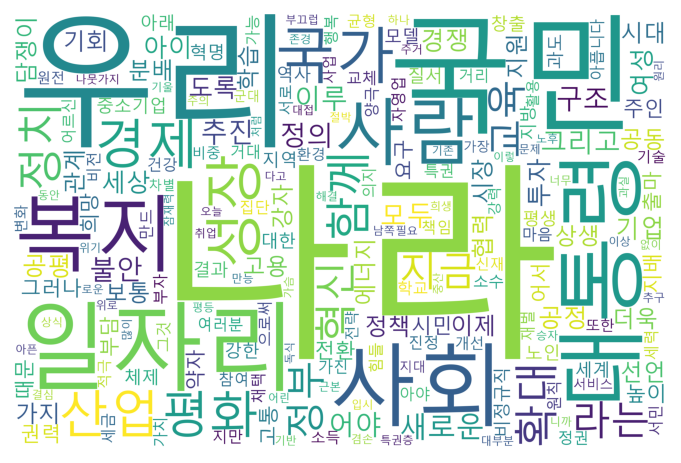

In [173]:
## 문재인
word_cloud_moon = WordCloud(font_path='C;/windows/Fonts/malgun.ttf',
                           background_color='white', width = 3000, height = 2000).generate_from_frequencies(word_moon)
plt.imshow(word_cloud_moon)
plt.axis('off')
plt.show()

In [174]:
word_park = dict(Counter(park_word).most_common())
word_park

{'국민': 74,
 '행복': 23,
 '여러분': 22,
 '정부': 18,
 '경제': 16,
 '함께': 13,
 '국가': 13,
 '우리': 12,
 '신뢰': 11,
 '사람': 10,
 '사회': 10,
 '일자리': 9,
 '교육': 9,
 '도록': 9,
 '새로운': 8,
 '불안': 8,
 '발전': 8,
 '정책': 8,
 '복지': 7,
 '면서': 6,
 '지만': 6,
 '중요': 6,
 '과제': 6,
 '나라': 5,
 '고통': 5,
 '대한': 5,
 '노력': 5,
 '정치': 5,
 '동안': 5,
 '지금': 5,
 '성장': 5,
 '운영': 5,
 '어야': 5,
 '창출': 5,
 '핵심': 5,
 '투명': 5,
 '산업': 5,
 '지원': 5,
 '실천': 5,
 '정보': 5,
 '이루': 4,
 '대통령': 4,
 '때문': 4,
 '다시': 4,
 '시작': 4,
 '위기': 4,
 '이러': 4,
 '문제': 4,
 '니까': 4,
 '국정': 4,
 '지식': 4,
 '시대': 4,
 '기업': 4,
 '지속': 4,
 '약속': 4,
 '존경': 3,
 '어지': 3,
 '과정': 3,
 '어머니': 3,
 '그리고': 3,
 '모두': 3,
 '개인': 3,
 '해결': 3,
 '고자': 3,
 '가장': 3,
 '가치': 3,
 '기적': 3,
 '같이': 3,
 '이제': 3,
 '만드': 3,
 '변화': 3,
 '반드시': 3,
 '격차': 3,
 '부담': 3,
 '미래': 3,
 '안보': 3,
 '어디': 3,
 '필요': 3,
 '개개인': 3,
 '실현': 3,
 '확립': 3,
 '위한': 3,
 '효율': 3,
 '책임': 3,
 '경쟁력': 3,
 '적극': 3,
 '마련': 3,
 '50': 3,
 '추진': 3,
 '확실': 3,
 '깨끗': 3,
 '공개': 3,
 '마음': 3,
 '씨앗': 3,
 '18': 2,
 '시간': 2,
 '어려움': 2,
 '이겨낼': 2

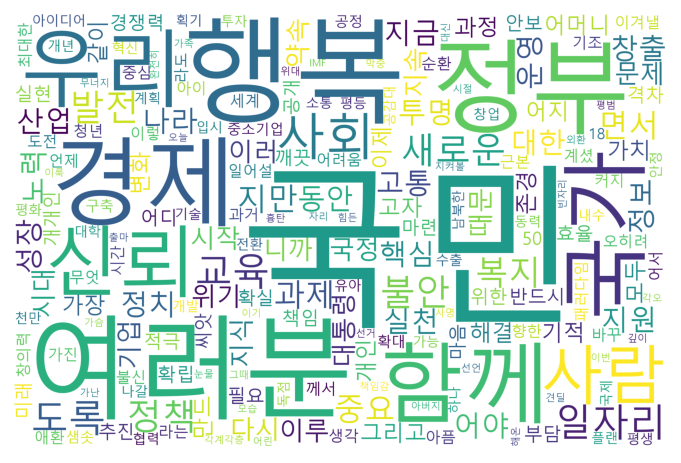

In [176]:
## 박근혜
word_cloud_moon = WordCloud(font_path='C;/windows/Fonts/malgun.ttf',
                           background_color='white', width = 3000, height = 2000).generate_from_frequencies(word_park)
plt.imshow(word_cloud_moon)
plt.axis('off')
plt.show()

In [177]:
docs = [content_moon, content_park]

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf = tfidf.fit(docs)
tfidf.transform(docs).toarray()
vocab = tfidf.get_feature_names()

In [178]:
vocab

['10',
 '100세',
 '15',
 '18대',
 '1석',
 '20여년이',
 '2백',
 '3년',
 '3대',
 '4대',
 '4대강',
 '4조의',
 '50년',
 '50주년',
 '5개년',
 '5년',
 '6자회담과',
 '6자회담을',
 'imf',
 'nll',
 'oecd',
 'sns를',
 '不飛不鳴',
 '損上益下',
 '가겠습니다',
 '가고자하는',
 '가난을',
 '가난한',
 '가느냐',
 '가는',
 '가능하게',
 '가동을',
 '가득',
 '가르침입니다',
 '가사와',
 '가슴',
 '가슴깊이',
 '가슴에',
 '가야',
 '가야했습니다',
 '가장',
 '가졌던',
 '가족',
 '가족구조',
 '가족이었습니다',
 '가지',
 '가지고',
 '가지는',
 '가지의',
 '가진',
 '가질',
 '가치',
 '가치가',
 '가치를',
 '가치였습니다',
 '가칭',
 '각계각층의',
 '각오로',
 '각자의',
 '각종',
 '간과하였고',
 '간의',
 '갈등이',
 '감당하는',
 '감사합니다',
 '강력한',
 '강요하던',
 '강자가',
 '강자의',
 '강자지배',
 '강자지배의',
 '강점을',
 '강조되어야',
 '강조하면서',
 '강하게',
 '강하고',
 '강한',
 '강화하겠습니다',
 '강화하고',
 '강화하여',
 '강화해',
 '갖고',
 '갖지',
 '갖추기',
 '같은',
 '같이',
 '갚기',
 '갚는',
 '개개인의',
 '개개인이',
 '개념을',
 '개를',
 '개발독재',
 '개발사업이',
 '개방',
 '개방형',
 '개선됩니다',
 '개선하겠습니다',
 '개선하고',
 '개성공단을',
 '개인의',
 '개천에서',
 '개최하여',
 '개혁도',
 '거기에',
 '거대기업의',
 '거대한',
 '거름을',
 '거리를',
 '거부합니다',
 '거시구조적',
 '거점으로',
 '거창하게만',
 '거쳐',
 '걱정거리가',
 '걱정하게',
 '건강불안',
 '건강지원',
 '건강

In [179]:
import pandas as pd

df = pd.DataFrame(tfidf.transform(docs).toarray(), columns=vocab)
df = df.T
df.rename(columns = {0:'Moon', 1:'Park'})

,Moon,Park
10,0.016769,0.000000
100세,0.000000,0.019426
15,0.016769,0.000000
18대,0.000000,0.038851
1석,0.016769,0.000000
...,...,...
힘없는,0.033539,0.000000
힘으로,0.000000,0.019426
힘을,0.000000,0.019426
힘의,0.016769,0.000000
